In [38]:
# To perform training and testing of model using csv files 

In [1]:
!pip install seaborn

In [2]:
!pip install wheel
!pip install pandas
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib

In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Stations_data=pd.read_csv("Stations.csv")
Stations_data.head(5)

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
Stations_data['STATE/COUNTRY ID']=label_encoder.fit_transform(Stations_data['STATE/COUNTRY ID'])

In [7]:
Stations_data.head(3)

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,0,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,0,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,0,3643N,00314E,23,36.716667,3.216667


In [8]:
dummy_Stations_data=pd.get_dummies(Stations_data)
dummy_Stations_data.head(3)

,WBAN,STATE/COUNTRY ID,ELEV,Latitude,Longitude,NAME_ABADAN,NAME_ACCRA,NAME_ADANA,NAME_AGRA,NAME_AIN EL,...,LON_15812W,LON_15914E,LON_15935W,LON_15949W,LON_16205W,LON_16715E,LON_16744E,LON_17143W,LON_17508W,LON_17725E
0,33013,0,611,36.383333,6.650000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,33031,0,88,35.616667,0.583333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33023,0,23,36.716667,3.216667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dummy_Stations_data.shape

(161, 479)

In [10]:
x=dummy_Stations_data.drop('WBAN',axis=1)
y=dummy_Stations_data['WBAN']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
x_train.shape,x_test.shape

((128, 478), (33, 478))

In [17]:
import sklearn.linear_model
!pip install sklearn
import sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=c67e2f9ebe48e89d9e6a752ef424fb9ac25267e33bfcb9337335fbb4e9290fff
  Stored in directory: c:\users\sonali.b.choudhary\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [22]:
import sklearn.metrics
from sklearn import metrics

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [27]:
linear_regression.score(x_train,y_train)

1.0

In [28]:
y_pred=linear_regression.predict(x_test)
r2_score(y_test,y_pred)

0.707749250530844

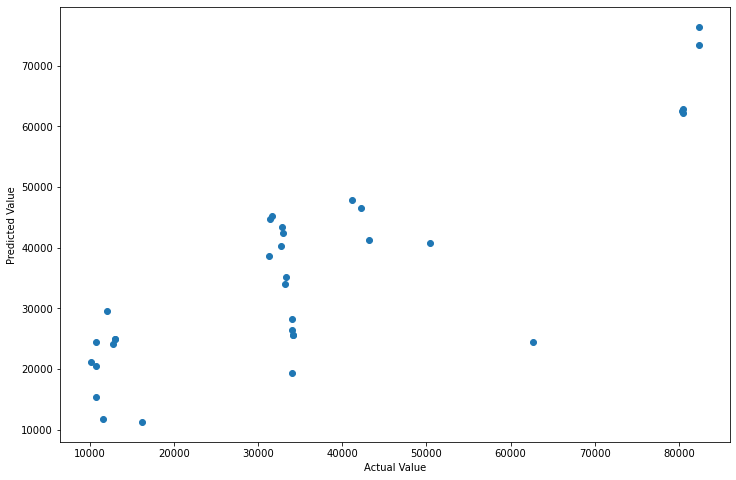

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()